Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

•	Is there a significant difference in the median value of houses bounded by the Charles river or not?
•	Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
•	Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
•	What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Details regarding the project will be broken down in the next reading sections.


In [5]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 2: Generate Descriptive Statistics and Visualizations

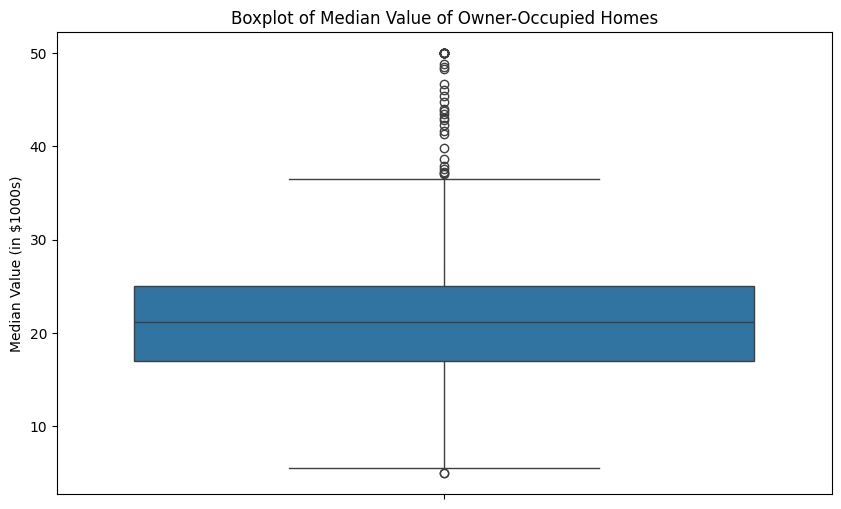

In [15]:
# Boxplot for the Median Value of Owner-Occupied Homes
plt.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

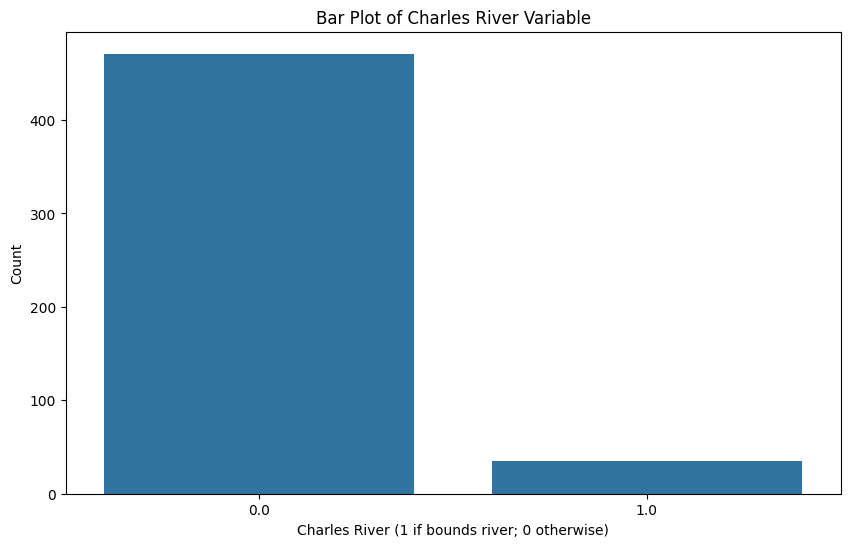

In [16]:
# Bar Plot for the Charles River Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 if bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

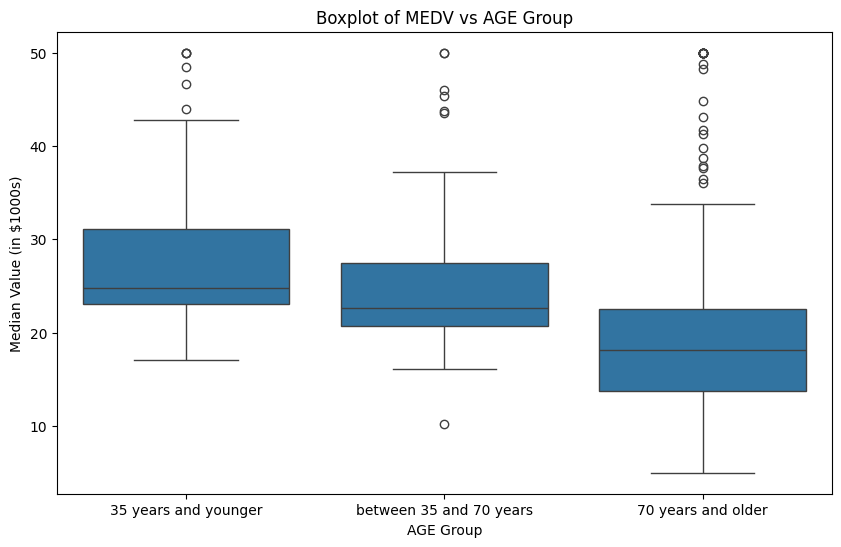

In [17]:
# Boxplot for MEDV vs AGE (Discretized AGE)
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

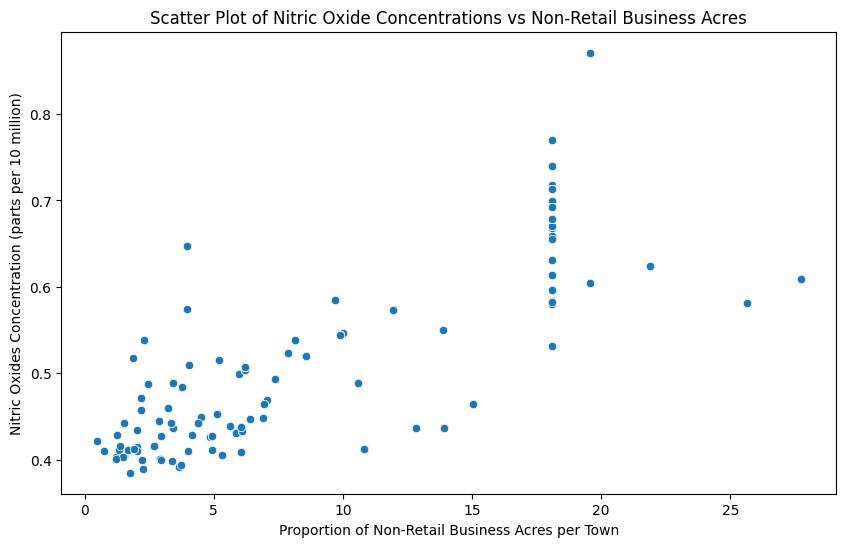

In [18]:
# Scatter Plot: Nitric Oxide Concentrations vs Non-Retail Business Acres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million)')
plt.show()

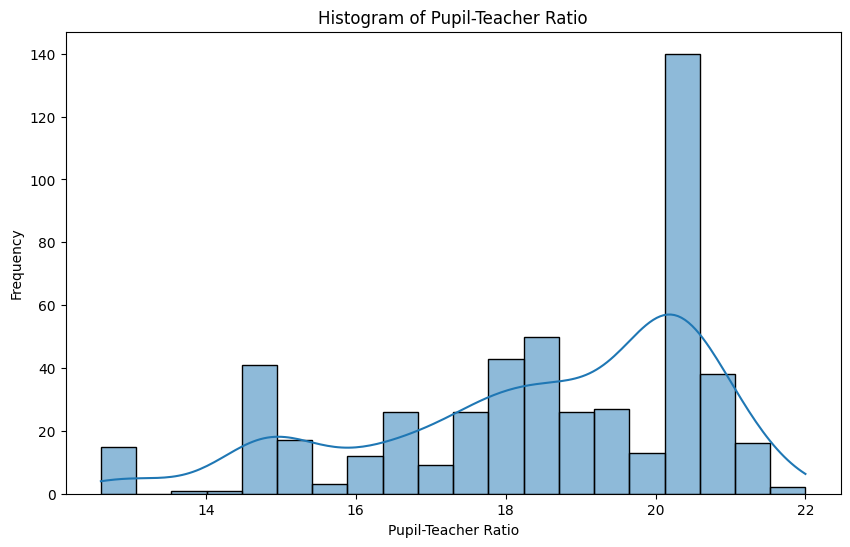

In [19]:
# Histogram for Pupil-Teacher Ratio Variable
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Task 3: Hypothesis Testing

In [20]:
# Difference in Median Value of Houses Bounded by the Charles River
# Hypothesis: Is there a significant difference in median value of houses bounded by the Charles river?
# H0: There is no difference
# H1: There is a difference

river = df[df['CHAS'] == 1]['MEDV']
no_river = df[df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(river, no_river, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in median values.")

T-statistic: 3.113291312794837, P-value: 0.0035671700981375174
Reject the null hypothesis - there is a significant difference in median values.


In [21]:
# Difference in Median Values of Houses for Each Proportion of Owner-Occupied Units Built Prior to 1940
# Hypothesis: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?
# H0: There is no difference
# H1: There is a difference

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

anova_result = ols('MEDV ~ AGE_GROUP', data=df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis - there is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in median values.")

                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis - there is a significant difference in median values.


<ipython-input-21-7d0b24e73c82>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [22]:
# Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres
# Hypothesis: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
# H0: There is no relationship
# H1: There is a relationship

corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print(f'Correlation coefficient: {corr}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant relationship.")
else:
    print("Fail to reject the null hypothesis - there is no significant relationship.")

Correlation coefficient: 0.7636514469209151, P-value: 7.913361061239527e-98
Reject the null hypothesis - there is a significant relationship.


In [23]:
# Impact of Weighted Distance to Employment Centers on Median Value of Homes
# Hypothesis: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?
# H0: No impact
# H1: There is an impact

X = df['DIS']
Y = df['MEDV']
X = sm.add_constant(X)  # Adding a constant term for the intercept

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        00:38:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0